# Exploratory Data Analysis with SQL

The purpose here is to use some queries to explore the data.


مؤشرات التنمية العالمية


استكشف مؤشرات التنمية في البلدان من جميع أنحاء العالم

In [1]:
# Sqlite is a library that implements a SQL database engine. 
import sqlite3
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


##  **Let's explore the Database**

## Selecting

1. **Extract the ERD from the provided data:** 

    - understand what are the different entities 

    - understand the different relations  

--------------

In [2]:
#connection
conn = sqlite3.connect('database.sqlite')

3. **Create a python function that:** 
    - takes a path of a sqlite database 
    - Once it called, it returns a connection object to be used. 

---------

In [5]:
#sqlite_master is a table with database schema
pd.read_sql(""" SELECT *
                FROM sqlite_master
                WHERE type='table';""",
           conn)

,type,name,tbl_name,rootpage,sql
0,table,Country,Country,2,"CREATE TABLE Country (\n CountryCode TEXT,\..."
1,table,CountryNotes,CountryNotes,186,CREATE TABLE CountryNotes (\n Countrycode T...
2,table,Series,Series,948,"CREATE TABLE Series (\n SeriesCode TEXT,\n ..."
3,table,Indicators,Indicators,4448,CREATE TABLE Indicators (\n CountryName TEX...
4,table,SeriesNotes,SeriesNotes,1317550,CREATE TABLE SeriesNotes (\n Seriescode TEX...
5,table,Footnotes,Footnotes,1317587,CREATE TABLE Footnotes (\n Countrycode TEXT...


3. **Create a python function that:** 
    - takes a connection object to a specific database
    - Once it called, it return a list of tables name in this database 

------------

In [6]:
# check the head
pd.read_sql("""SELECT *
               FROM Indicators
               LIMIT 3;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579


3. **Create a python function that:** 
    - takes a list of tables names as a paramter
    - for each table name , exectue a SQL Query to return only the first row of the table. 

-----------------------------

In [7]:
# how many rows?
pd.read_sql("""SELECT COUNT(*)
               FROM Indicators;""",
           conn)

,COUNT(*)
0,5656458


4. **Create a python function that:** 
    - takes a list of tables names as a paramter
    - for each table name , exectue a SQL Query to return number of rows in the table. 

--------------------------

In [8]:
# if I need filter not null
pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName IS NOT NULL limit 5;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


4. **Create a python function that:** 
    - takes two parameter : 1. table's name,  column's name
    - return all data from this table where this column name is not null

--------------------

checking for missing values in all columns

In [10]:
# checking for missing values in all columns
pd.read_sql("""SELECT COUNT(*) - COUNT(CountryName) AS missing_CountryName,
                      COUNT(*) - COUNT(CountryCode) AS missing_CountryCode,
                      COUNT(*) - COUNT(IndicatorName) AS missing_IndicatorName,
                      COUNT(*) - COUNT(IndicatorCode) AS missing_IndicatorCode, 
                      COUNT(*) - COUNT(Year) AS missing_Year, 
                      COUNT(*) - COUNT(Value) AS missing_Value
                FROM Indicators;""",
           conn)

,missing_CountryName,missing_CountryCode,missing_IndicatorName,missing_IndicatorCode,missing_Year,missing_Value
0,0,0,0,0,0,0


get column name in for a specific table 

In [11]:
def get_column_names(table_name, conn):
    query = f"PRAGMA table_info({table_name});"
    result = pd.read_sql(query, conn)
    return result['name'].tolist()

# Example usage:
table_name = 'Series'
column_names = get_column_names(table_name, conn)
print(column_names)

['SeriesCode', 'Topic', 'IndicatorName', 'ShortDefinition', 'LongDefinition', 'UnitOfMeasure', 'Periodicity', 'BasePeriod', 'OtherNotes', 'AggregationMethod', 'LimitationsAndExceptions', 'NotesFromOriginalSource', 'GeneralComments', 'Source', 'StatisticalConceptAndMethodology', 'DevelopmentRelevance', 'RelatedSourceLinks', 'OtherWebLinks', 'RelatedIndicators', 'LicenseType']


4. **Create a python function that:** 
    - takes two parameter : 1. table's name
    - return the count of missing values in each column in this table

-----------------

In [12]:
# selecting distinct indicators
pd.read_sql("""SELECT count(DISTINCT IndicatorName) as Distinct_Indicators 
                FROM Indicators;""",
           conn)

,Distinct_Indicators
0,1344


In [13]:
# selecting distinct indicators
pd.read_sql("""SELECT DISTINCT IndicatorName
                FROM Indicators;""",
           conn)

,IndicatorName
0,"2005 PPP conversion factor, GDP (LCU per inter..."
1,"2005 PPP conversion factor, private consumptio..."
2,ARI treatment (% of children under 5 taken to ...
3,Access to electricity (% of population)
4,"Access to electricity, rural (% of rural popul..."
...,...
1339,Women's share of population ages 15+ living wi...
1340,"Youth literacy rate, population 15-24 years, b..."
1341,"Youth literacy rate, population 15-24 years, f..."
1342,"Youth literacy rate, population 15-24 years, g..."


In [14]:
df = pd.read_sql("""SELECT DISTINCT IndicatorName
                FROM Indicators;""",
           conn) 

In [15]:
df.shape[0]

1344

4. **Create a python function that:** 
    - takes two parameter : 1. table's name and a specific column name 
    - return the Distinct Values of this column as a dataframe, and its count 

------------------

## Filtering 

In [16]:
# I wanna search for some indicator about GDP
pd.read_sql("""SELECT DISTINCT IndicatorName
               FROM Indicators
               WHERE IndicatorName LIKE 'GDP%';""",
           conn)

,IndicatorName
0,GDP (constant LCU)
1,GDP (current LCU)
2,GDP at market prices (constant 2005 US$)
3,GDP at market prices (current US$)
4,GDP deflator (base year varies by country)
5,GDP growth (annual %)
6,GDP per capita (constant 2005 US$)
7,GDP per capita (constant LCU)
8,GDP per capita (current LCU)
9,GDP per capita (current US$)


In [17]:
# how about GDP per capita of Brazil in last years ?
pd.read_sql(""" SELECT *
                FROM Indicators
                WHERE IndicatorName ='GDP per capita (current US$)'
                AND CountryName = "Brazil"
                AND Year>=2010;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2010,11124.245780
1,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,13042.421933
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,11922.513058
3,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,11711.004405
4,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,11384.415010


In [18]:
# let's check the 90's in Brazil
pd.read_sql("""SELECT * 
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND CountryName='Brazil'
               AND Year BETWEEN 1990 AND 1999;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1990,3071.627953
1,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1991,3942.403941
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1992,2578.207009
3,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1993,2774.174127
4,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1994,3482.529816
5,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1995,4827.152443
6,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1996,5163.265813
7,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1997,5279.111298
8,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1998,5083.700964
9,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1999,3476.144038


In [19]:
# let's check other countries in 2014
pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND CountryName IN ("Brazil", "China", "India")
               AND Year=2014;""",
            conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,11384.415010
1,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,7590.016441
2,India,IND,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1581.510703


4. **Create a python function that:** 
    - takes three parameteres : 1. table's name, specific column name, an expression (string value) 
    - return the Distinct Values of this column as a dataframe, and its count based on the string (it act as the condition that comes after the where clause)

----------------

## 3- Aggregating and Summarizing

In [20]:
pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName = 'GDP per capita (current US$)'
               AND Year = 2014;""",
            conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,7386.428444
1,Caribbean small states,CSS,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,10164.320958
2,Central Europe and the Baltics,CEB,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,14086.521810
3,East Asia & Pacific (all income levels),EAS,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,9475.349629
4,East Asia & Pacific (developing only),EAP,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,6240.403751
...,...,...,...,...,...,...
210,Vanuatu,VUT,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,3147.963779
211,Vietnam,VNM,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,2052.294202
212,West Bank and Gaza,WBG,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,2965.903675
213,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1721.623274


In [21]:
# let's search for the highest GDP per capita in 2014
pd.read_sql("""SELECT CountryName, MAX (Value)
               FROM Indicators
               WHERE IndicatorName = 'GDP per capita (current US$)'
               AND Year = 2014;""",
            conn)

,CountryName,MAX (Value)
0,Luxembourg,116664.262488


In [23]:
#Let's order (and reafirm the highest GDP per capita)
pd.read_sql("""SELECT * 
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND Year= 2014
               ORDER BY Value DESC
               LIMIT 10;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,116664.262488
1,Norway,NOR,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,97307.421592
2,Qatar,QAT,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,96732.402545
3,"Macao SAR, China",MAC,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,96038.050724
4,Switzerland,CHE,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,85594.326601
5,Australia,AUS,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,61925.496062
6,Denmark,DNK,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,60707.249365
7,Sweden,SWE,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,58938.772748
8,Singapore,SGP,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,56284.578405
9,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,54629.495168


In [24]:
# Let's compare the averages
pd.read_sql(""" SELECT CountryName, AVG(Value)
                FROM Indicators
                WHERE IndicatorName= 'GDP per capita (current US$)'
                AND CountryName IN ('Brazil', 'China', 'India', 'Angola')
                AND Year>2010
                GROUP BY CountryName;""",
           conn)

,CountryName,AVG(Value)
0,Angola,5495.348173
1,Brazil,12015.088601
2,China,6605.175319
3,India,1489.484052


In [27]:
#how many measures during this time?
pd.read_sql(""" SELECT CountryName, count (*) AS n_measures
                FROM Indicators
                WHERE IndicatorName= 'GDP per capita (current US$)'
                AND CountryName IN ('Brazil', 'China', 'India', 'Angola')
                AND Year>2010
                GROUP BY CountryName
                ORDER BY n_measures
                LIMIT 10;""",
           conn)

,CountryName,n_measures
0,Angola,3
1,Brazil,4
2,China,4
3,India,4


In [28]:
# important to know that Angola has less measures during this time
pd.read_sql(""" SELECT *
                FROM Indicators
                WHERE IndicatorName= 'GDP per capita (current US$)'
                AND CountryName = 'Angola'
                AND Year>2010;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,5053.738649
1,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,5531.776299
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,5900.529570


- **Create a question and solve it => Get insight**

    * Use Group by logic to get insite of the data, in other words : 
     
    * try to answer a question from this database and use the group by to solve it :  

------------

## Joins 

In [30]:
# let's make a join to get the information about indicators GDP related measured in 2014 in Brazil
pd.read_sql(""" SELECT Indicators.*, Series.LongDefinition
                FROM Indicators
                LEFT JOIN Series 
                ON Indicators.IndicatorName  = Series.IndicatorName
                WHERE Indicators.IndicatorName LIKE 'GDP%'
                AND CountryName ='Brazil'
                AND Year=2014;""",
            conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,LongDefinition
0,Brazil,BRA,GDP (constant LCU),NY.GDP.MKTP.KN,2014,1.872042e+12,GDP is the sum of gross value added by all res...
1,Brazil,BRA,GDP (current LCU),NY.GDP.MKTP.CN,2014,5.521256e+12,GDP at purchaser's prices is the sum of gross ...
2,Brazil,BRA,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,2014,1.206071e+12,None
3,Brazil,BRA,GDP at market prices (current US$),NY.GDP.MKTP.CD,2014,2.346076e+12,None
4,Brazil,BRA,GDP deflator (base year varies by country),NY.GDP.DEFL.ZS,2014,2.949323e+02,The GDP implicit deflator is the ratio of GDP ...
5,Brazil,BRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,1.447074e-01,Annual percentage growth rate of GDP at market...
6,Brazil,BRA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,5.852500e+03,GDP per capita is gross domestic product divid...
7,Brazil,BRA,GDP per capita (constant LCU),NY.GDP.PCAP.KN,2014,9.084146e+03,GDP per capita is gross domestic product divid...
8,Brazil,BRA,GDP per capita (current LCU),NY.GDP.PCAP.CN,2014,2.679208e+04,GDP per capita is gross domestic product divid...
9,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1.138442e+04,GDP per capita is gross domestic product divid...


---------------

## 5- Using CASE WHEN

CASE statements are like "IF this THEN that". 

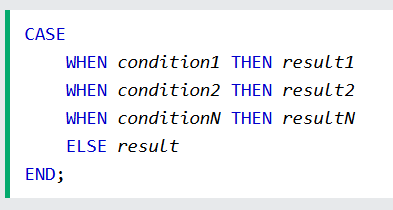

In [34]:
# I'm using arbitrary values, this is an exercise with didactic purposes: cuts on 10000 and 80000
df=pd.read_sql(""" SELECT *,
                   CASE 
                    WHEN Value < 10000 THEN 'Low'
                    WHEN Value > 80000 THEN 'High'
                    ELSE 'Medium' 
                   END AS Category
               
                   FROM Indicators
                   WHERE IndicatorName='GDP per capita (current US$)'
                   AND Year=2014;""",
              conn)

In [35]:
df

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,Category
0,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,7386.428444,Low
1,Caribbean small states,CSS,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,10164.320958,Medium
2,Central Europe and the Baltics,CEB,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,14086.521810,Medium
3,East Asia & Pacific (all income levels),EAS,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,9475.349629,Low
4,East Asia & Pacific (developing only),EAP,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,6240.403751,Low
...,...,...,...,...,...,...,...
210,Vanuatu,VUT,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,3147.963779,Low
211,Vietnam,VNM,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,2052.294202,Low
212,West Bank and Gaza,WBG,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,2965.903675,Low
213,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1721.623274,Low


C:\Users\Microsoft\AppData\Local\Temp\ipykernel_17576\3499132436.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(df.Value, bins=40, hist_kws={'edgecolor':'k'}, color='mediumseagreen',kde=False,ax=axes[0])
C:\Users\Microsoft\AppData\Local\Temp\ipykernel_17576\3499132436.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.countplot(x='Category', data=df, palette="Greens", ax=axes[1])


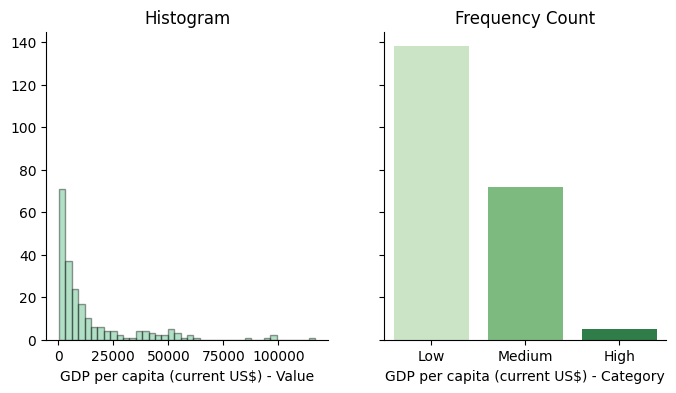

In [36]:
fig, axes= plt.subplots(1,2, figsize=(8,4),sharey=True)

ax1= sns.distplot(df.Value, bins=40, hist_kws={'edgecolor':'k'}, color='mediumseagreen',kde=False,ax=axes[0])
ax1.set_title('Histogram')
ax1.set(xlabel="GDP per capita (current US$) - Value")
ax1= sns.despine()

ax2= sns.countplot(x='Category', data=df, palette="Greens", ax=axes[1])
ax2.set_title('Frequency Count')
ax2.set(xlabel="GDP per capita (current US$) - Category")
ax2= sns.despine();

In [37]:
fig.savefig('eda_sql.png', transparent=True)

-----------------------

## 6 - Window Function

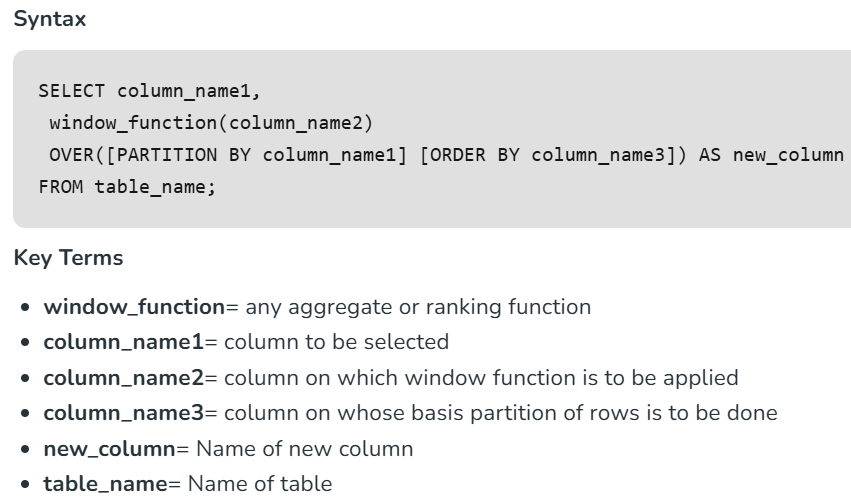

With a window function, we can make calculations across rows "in a window" and return a value for each row.
This window can be, for example, grouped sets based on another column or even an ordered set.

In [38]:
# adding the mean of last 3 years using window function

pd.read_sql(""" SELECT *,
                ROUND( AVG(Value) OVER (PARTITION BY CountryCode) ,0) AS AVG_3Y
                FROM Indicators
                WHERE IndicatorName='GDP per capita (current US$)'
                AND Year IN (2012,2013,2014);""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,AVG_3Y
0,Andorra,ADO,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,39666.369215,41236.0
1,Andorra,ADO,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,42806.522553,41236.0
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,690.842629,664.0
3,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,666.795051,664.0
4,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,633.569247,664.0
...,...,...,...,...,...,...,...
659,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,1759.192902,1722.0
660,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1721.623274,1722.0
661,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,850.827694,896.0
662,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,905.500322,896.0


-----------------

## 7 - Common Table Expression (CTE)

- In SQL, a Common Table Expression (CTE) is an essential tool for simplifying complex queries and making them more readable. 

- CTE will save results of a query temporary. 

For example, can also help filtering based on ranking results. 

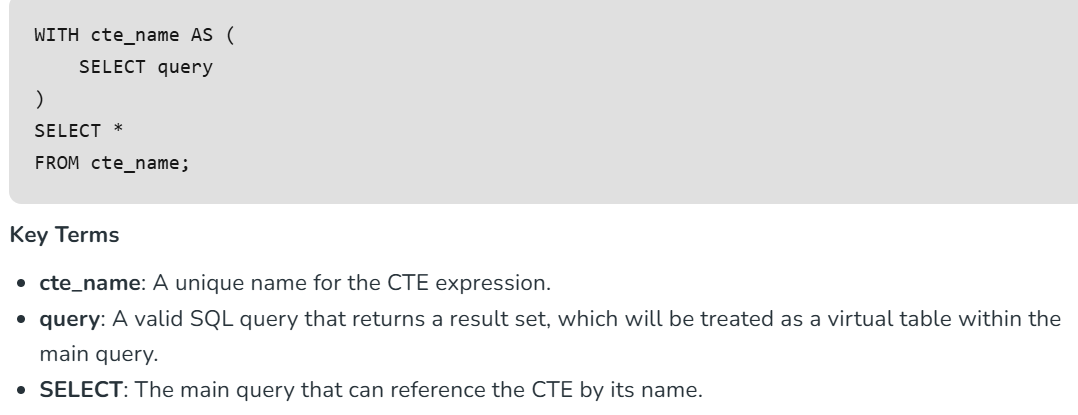

In [41]:
# the first place from each year
pd.read_sql("""
                SELECT *,
                    RANK () OVER (PARTITION BY Year ORDER BY Value DESC) AS myrank
                    FROM Indicators
                    WHERE IndicatorName='GDP per capita (current US$)'
                    AND Year IN (2012,2013,2014);""",
              
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,myrank
0,Liechtenstein,LIE,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,149160.758132,1
1,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,105447.093241,2
2,Norway,NOR,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,101563.702678,3
3,Qatar,QAT,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,94407.406920,4
4,Bermuda,BMU,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,85458.455508,5
...,...,...,...,...,...,...,...
659,"Congo, Dem. Rep.",ZAR,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,442.339539,211
660,Niger,NER,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,427.373240,212
661,Central African Republic,CAF,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,358.537836,213
662,Burundi,BDI,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,286.002336,214


In [40]:
# the first place from each year
pd.read_sql(""" WITH GDP_3 AS 
               (
                    SELECT *,
                    RANK () OVER (PARTITION BY Year ORDER BY Value DESC) AS myrank
                    FROM Indicators
                    WHERE IndicatorName='GDP per capita (current US$)'
                    AND Year IN (2012,2013,2014)
               )
                
               SELECT *
               FROM GDP_3
               WHERE myrank = 1;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,myrank
0,Liechtenstein,LIE,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,149160.758132,1
1,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,113726.638979,1
2,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,116664.262488,1
